In [1]:
!pip install ita


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import ita

%matplotlib inline

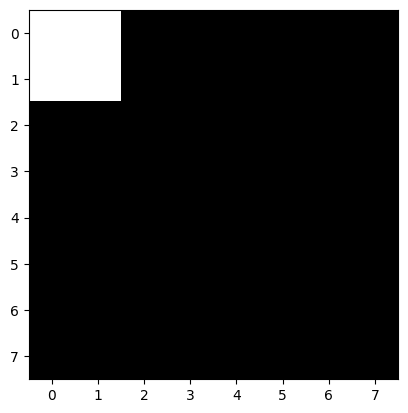

In [3]:
def count_neighbors(board, i, j):
    cnt = 0
    for k in range(i - 1, i + 2):
        for l in range(j - 1, j + 2):
            if 0 <= k < len(board) and 0 <= l < len(board[k]):
                cnt += board[k][l]
    return cnt - board[i][j]


def is_alive(board, i, j):
    neighbors_cnt = count_neighbors(board, i, j)
    if board[i][j] == 0:
        if neighbors_cnt == 3:
            return 1
        else:
            return 0
    else:
        if 2 <= neighbors_cnt <= 3:
            return 1
        elif neighbors_cnt <= 1:
            return 0
        elif neighbors_cnt >= 4:
            return 0


def next_generation(board):
    row = len(board)
    column = len(board[0])
    next_board = [[0 for _ in range(column)] for _ in range(row)]
    for i in range(len(board)):
        for j in range(len(board[0])):
            next_board[i][j] = is_alive(board, i, j)
    return next_board


def life_game(board, n):
    results = [0 for _ in range(n)]
    results[0] = board
    for i in range(1, n):
        results[i] = next_generation(results[i - 1])
    return results


data = [
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
]
n = 20
images = life_game(data, n)
ita.plot.animation_show(images)